<h2> Nauczanie maszynowe/Ćwiczenia4

<h3> Drzewa decyzyjne

Drzewa decyzyjne to graficzna metoda wspomagania procesu decyzyjnego. Tworzony 
jest model drzewiasty, który następnie używany jest do klasyfiakcji.

Elementy struktury drzewa:
- wierzchołek (punkt górny drzewa), z którego następują odgałęzienia
- węzły poprzednika na wyższym poziomie o odgałęzieniach łączących węzły następnika na niższym poziomie
- liście stanowiące końcową część drzewa, którym przypisane są odpowiednie klasy.

Budujemy a w taki sposób aby minimalizować:

- współczynnik Giniego $I = 1 - \sum_i r_{i}^{2}$

lub 

- entropię $I = -\sum_i r_i \log_2 r_i$

gdzie $r_i$ to proporcja wystąpień $i-$tej klasy w aktualnym obszarze.

<h4> Zadanie1: Jaką minimalną i maksymalną wartość może przyjmować współczynnik Giniego? Uzasadnij. Co to wtedy oznacza?

Współczynnik Giniego mierzy stopień niezgodności rozkładu wartości z tym jak wyglądałyby rozkład, w którym wszystkie wartości są równe.



---



Minimalna wartość współczynnika Giniego to 0 (0%), całkowita równość obserwowanych wartości.


---


Maksymalna wartość współczynnika Giniego to 1 (100%), całkowita nierówność. Współczynnik ten może teoretycznie przyjmować wartość większą niż 1 jeśli dopuszczamy obserwacje ujemne. 




In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
np.unique(y)

array([0, 1, 2])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Kryterium jest entropia

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train);

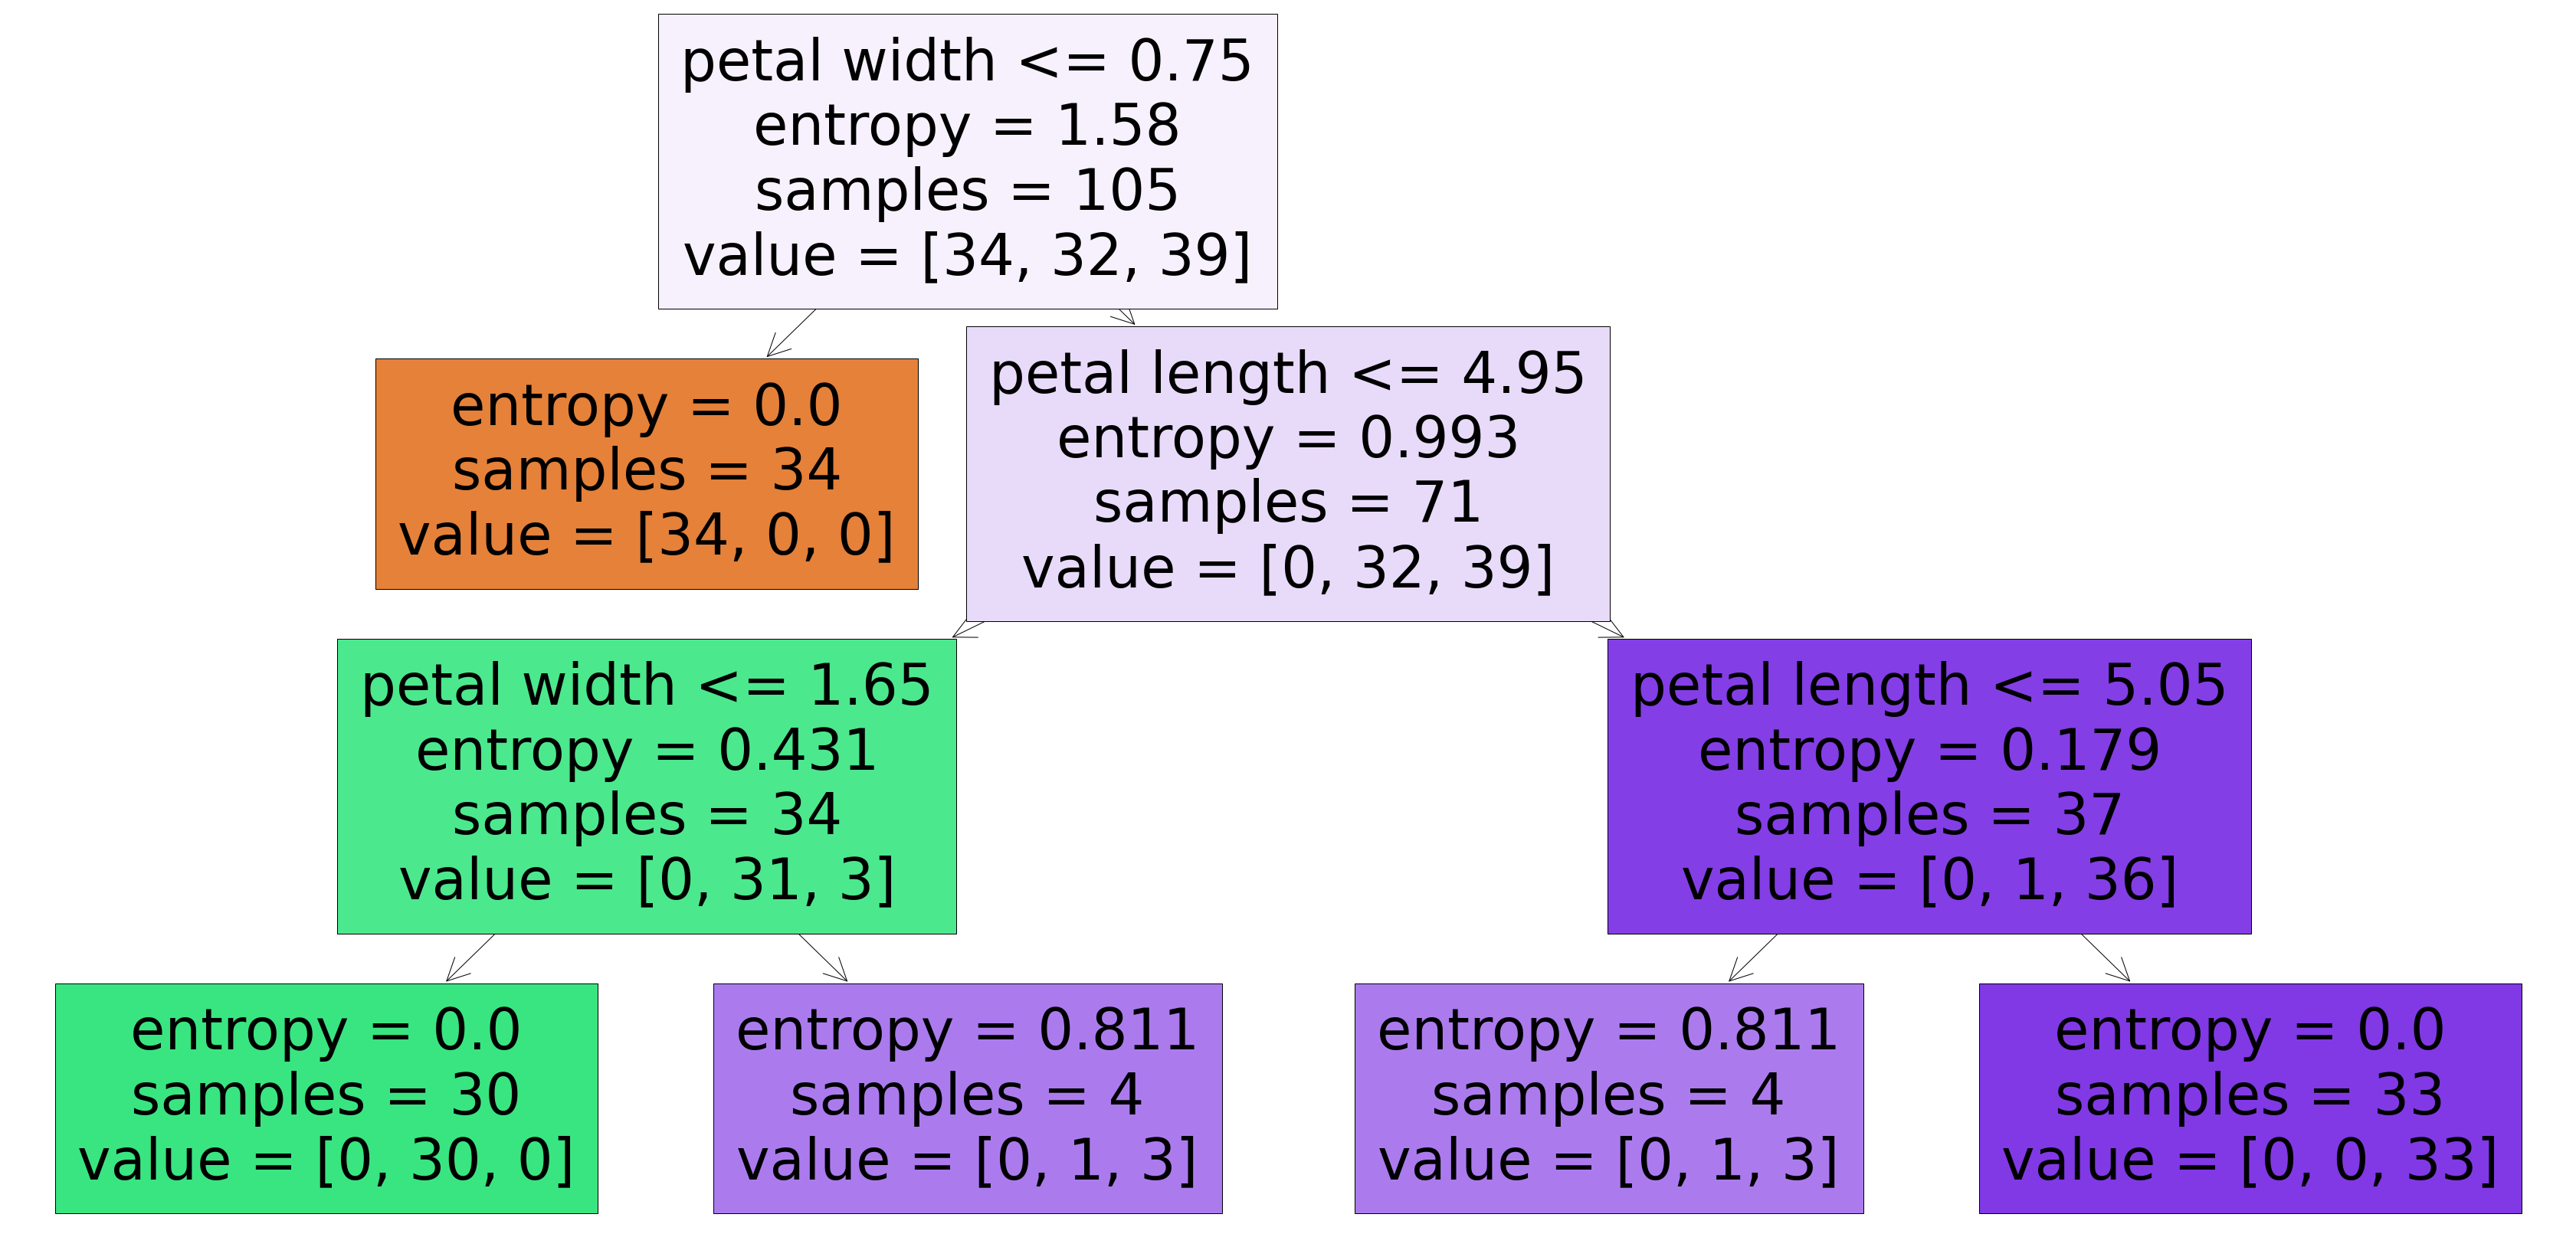

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(tree, filled=True, feature_names=['petal length', 'petal width']);

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


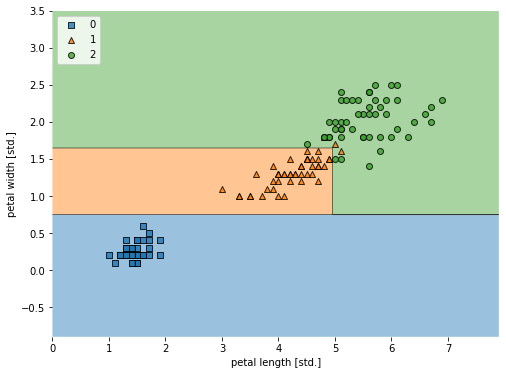

In [ ]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8, 6))
plot_decision_regions( X=X, y=y, clf=tree)
plt.xlabel('petal length [std.]')
plt.ylabel('petal width [std.]')
plt.legend(loc='upper left')
plt.show()

In [ ]:
print(tree.predict([[1.4, 0.2]]))
print()
print(tree.predict([[5.1, 1.8]]))

[0]

[2]


<h4> Zadanie2: Uzasadnij wartość entropii w wierzchołku (u samej góry) poprzez bezpośrednie obliczenia.

- entropia $I = -\sum_i r_i \log_2 r_i$

In [ ]:
import math

In [ ]:
a = -34/105 * math.log(34/105, 2) +   -32/105 * math.log(32/105, 2) +  -39/105 * math.log(39/105, 2)

In [ ]:
a

1.579917678255273

Kryterium jest indeks Giniego

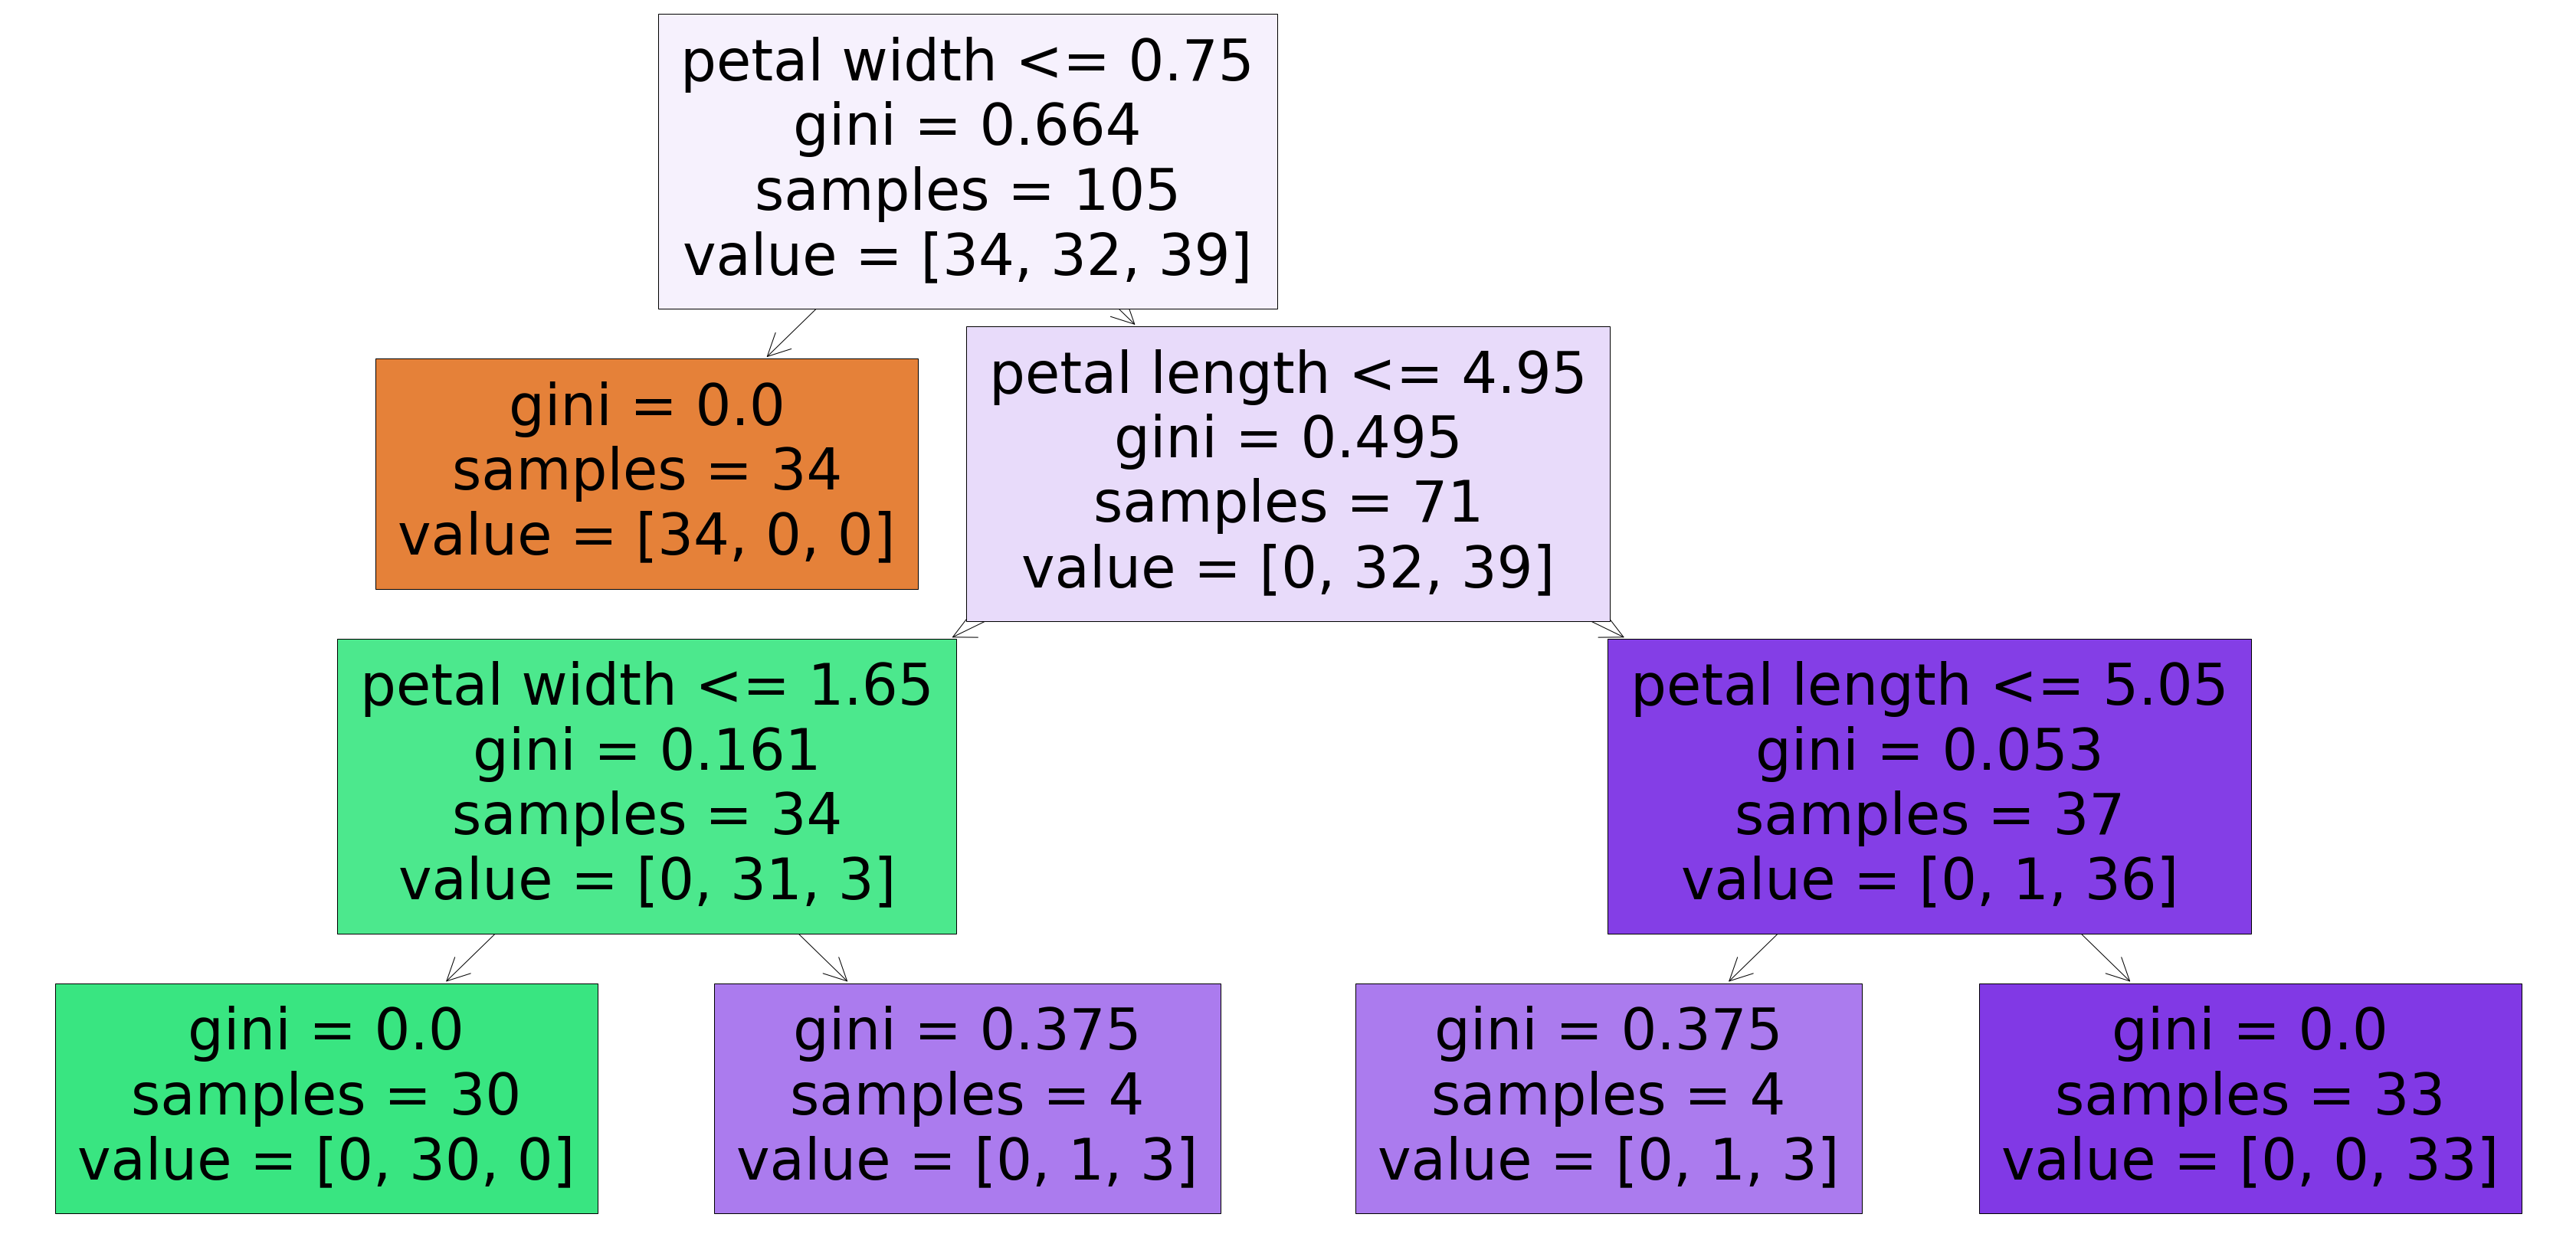

In [ ]:
tree_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
tree_gini.fit(X_train, y_train)

plt.figure(figsize=(60,30))
plot_tree(tree_gini, filled=True, feature_names=['petal length', 'petal width']);

<h4> Zadanie3: Uzasadnij wartość indeksu Giniego w wierzchołku (u samej góry) poprzez bezpośrednie obliczenia.

In [ ]:
I = 1 - (34/105)**2 - (32/105)**2 - (39/105)**2 

In [ ]:
I

0.6643083900226757

<h3> Las losowy (Random Forest)

Losowy las jest odmianą zespołu drzew decyzyjnych implementujących wiele losowo generowanych drzew decyzyjnych na raz, które wspópracując ze sobą, tworzą finalne rozwiązanie o podwyższonej dokładności.

- do przewidywania wartości zmiennej zależnej stosuje się zespół wielu, stosunkowo prostych drzew decyzyjnych
- każde drzewo dokonuje predykcji wartości zmiennej zależnej na podstawie losowego zespołu zmiennych niezależnych
- przewidywanie końcowej wartości modelu wyznaczoneg jest przez głosowanie (klasyfikacja) lub uśrednianie (zadanie regresji)

Użytkownik może określić:
- złożność drzew składowych
- maksymalna liczba drzew
- kryterium zakończenia procesu
- inne...

Dobrze sprawdza się na bardzo dużych zbiorach danych, z ogromną liczbą zmiennych niezależnych, bez konieczności ich usuwania.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#n_estimators - liczba drzew; inne np max_depth - maksymalna glębokosc drzewa, warto poczytac help(RandomForestClassifier)
forest = RandomForestClassifier(criterion='entropy',
                                 n_estimators=10,
                                 random_state=1)
forest.fit(X_train, y_train);

<h4> Zadanie4: Przeczytaj https://predictivesolutions.pl/jak-udoskonalic-algorytm-drzew-decyzyjnych. Sporządź odpowiednią notatkę.

Drzewa decyzyjne opierają się na metodzie dzielenia dużych zbiorów danych na kolejne mniejsze podzbiory na podstawie prostych, kolejnych binarnych decyzji.
Niestety, jedną z wad takiego rozwiązania jest duża zmienność drzew powstałych przy nawet małej zmianie danych wejściowych.

Jedną z prób zaradzenia takiej sytuacji jest bagging (agregacja bootstrapowa). Metoda ta polega na wielokrotnym losowaniu ze zwracaniem zbioru danych z którego stowrzymy drzewo - łącząc idee dzielenia danych na zbiory testowe i walidacyjne. Z wielu powstałych drzew zostaje stworzone finalne drzewo, tym samym otrzymujemy drzewo wynikowe oparte na predykcji z wielu drzew.

Agregacja bootsrapowa ma jednak pewne wady. Jeśli do budowy każdego drzewa wykorzystywane są dokładnie te same predyktory, to w przypadku zmiennych bardzo silnie skorelowanych z objaśnianym zjawiskiem może się zdarzyć, że każde z drzew wykorzysta do pierwszego podziału te samą zmienną. Może też dojść do wybrania zbyt wielkiej ilości zmiennych, co będzie za sobą pociągało długi czas uzyskania wyniku końcowego.

Lasy losowe w odróżnieniu od agregacji bootsrapowej wykorzystują w budowie poszczególnych modeli drzew decyzyjnych jedynie część dostępnych predyktorów. Takie rozwiązanie zwiększa stabilność modelu, jednak nie rozwiązuje problemu złożoności obliczeniowej, a metody predykcyjne nie są już tak przejrzyste i łatwe do zinterpretowania jak w przypadku pojedynczych drzew.

Wzmocnienie adaptacyjne (AdaBoost) zakłada połączenie sekwencyjne, w przeciwieństwie do lasów losowych, które przewidywały równoległe, kolejne klasyfikatory. W AdaBoost klasyfikatory są połączone, a ich poszczególne predykcje nie są kluczowo ważne. W AdaBoost każda kolejna iteracja zmienia wagi modelu, tym samym stara się poprawnie sklasyfikować to co zostało przez wcześniejsze drzewa źle sklasyfikowane.

Wzmocnienie adaptacyjne i jego zmiana wag w każdej kolejnej iteracji łatwo może doprowadzić do przetrenowania modelu. XGBoost wychodzi na przeciw temu problemowi wprowadzając składnik regularyzacji do metody iteracyjnej zmiany wag. W ten sposób kontrolowana jest złożoność modelu - ilość ostatecznych liści w drzewie. Należy jednak pamiętać, że nawet XGBoost nie jest algorytmem doskonałym i nie należy go stosować w każdej sytuacji.

<h4> Zadanie5: Modele lasu drzew decyzyjnych często wykorzystują metodę modyfikowania danych treningowych - agregację bootstrapową (bootstraping). Polega ona na wielokrotnym losowaniu ze zwracaniem. Jeżeli takie losowanie powtózymy $n$ razy, otrzymamy $n$ elementowy zbiór danych treningowych, w którym część przypadków będzie się powtarzać. Pokaż, że dla dużych $n$ próba będzie zawierała średnio $63 \%$ przypadków z orginalnego zbioru.

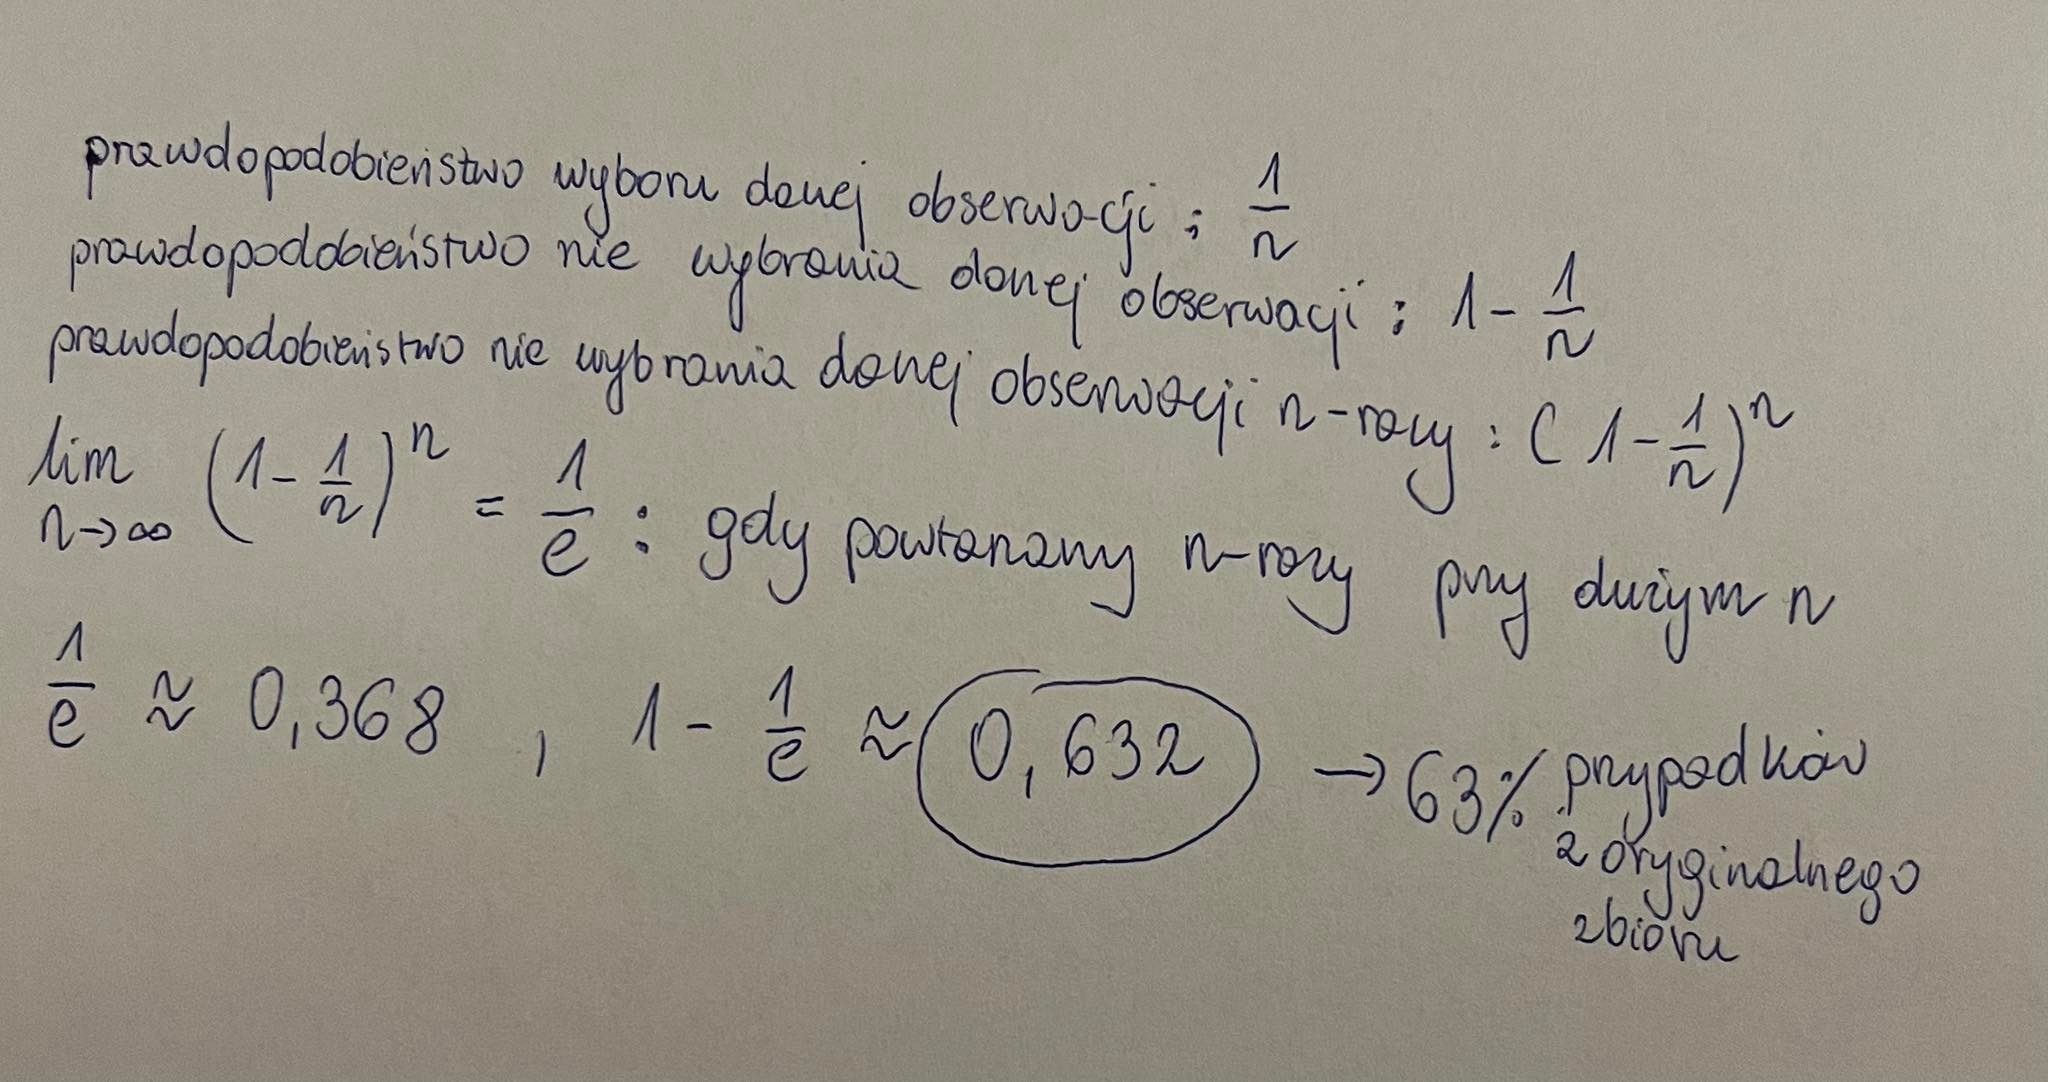

<h4> Zadanie6: Rozważ dane zawierające nagłówki, przy czym są to fake newsy (1298) oraz prawdziwe tytuły (1968). Jeden nagłówek to jeden rekord. 
    
- Wyznacz częstości występowania wszystkich słów ze wszystkich nagłówków.
- Jakie słowa (oprócz stopwordsów) najczęściej pojawiały się w realnych a jakie w fałszywych nagłówkach?

    Będziemy tworzyć klasyfiaktor dla tych danych w oparciu o regresję logistyczną oraz drzewa losowe/lasy losowe. Każdy nagłówek będzie reprezentowany w postaci wektora zer i jedynek w zależności od występowania danego słowa (długość wektora = liczba wszystkich unikatowych słów, może warto jednak zawęzić? albo potraktować jako hiperparametr).
    Podziel dane na 3 grupy: 70% zbiór treningowy, 15% zbiór walidacyjny, 15% zbiór testowy. Przetestuj różne zestawy hiperparametrów na zbiorze walidacyjnym. Skomentuj otrzymane wyniki.

In [136]:
f_words = open('/content/fake.txt', 'r')
r_words = open('/content/real.txt', 'r')


In [137]:
fake_dict = dict()
real_dict = dict()
both_dict = dict()

for line in f_words.readlines():
  for word in line.split():

    if word in fake_dict:
      fake_dict[word] += 1
    else:
      fake_dict[word] = 1

    if word in both_dict:
      both_dict[word] += 1
    else:
      both_dict[word] = 1

for line in r_words.readlines():
  for word in line.split():
    
    if word in real_dict:
      real_dict[word] += 1
    else:
      real_dict[word] = 1

    if word in both_dict:
      both_dict[word] += 1
    else:
      both_dict[word] = 1

In [138]:
len(fake_dict)

3718

In [139]:
fake = dict((key, value) for (key, value) in fake_dict.items() if value > 4)
len(fake)

536

In [140]:
len(real_dict)

3604

In [141]:
real = dict((key, value) for (key, value) in real_dict.items() if value > 4)
len(real)

536

In [142]:
len(both_dict)

5832

In [143]:
both = dict((key, value) for (key, value) in both_dict.items() if value > 4)
len(both)

1044

In [144]:
sorted(fake, key=fake.get, reverse=True)[:20]
# trump donald hillary clinton election

['trump',
 'the',
 'to',
 'in',
 'donald',
 'of',
 'for',
 'a',
 'and',
 'on',
 'is',
 'hillary',
 'clinton',
 'with',
 'will',
 'by',
 'he',
 'election',
 'just',
 'as']

In [145]:
sorted(real, key=real.get, reverse=True)[:20]
# trump donald trumps says election north clinton korea

['trump',
 'donald',
 'to',
 'us',
 'trumps',
 'in',
 'on',
 'of',
 'says',
 'for',
 'the',
 'and',
 'with',
 'a',
 'election',
 'north',
 'clinton',
 'as',
 'korea',
 'is']

In [146]:
f_words = open('/content/fake.txt', 'r')
r_words = open('/content/real.txt', 'r')

In [147]:
import pandas as pd

In [148]:
base = pd.DataFrame.from_dict(both, orient='index')
base = base.T
base = base.iloc[1: , :]
base

,trump,warns,of,vote,on,machines,this,election,is,not,...,weigh,running,apologises,dinner,hacking,share,spicer,parts,priebus,wrap


In [149]:
ix = 0
for line in f_words.readlines():
  base.loc[len(base)] = 0
  for word in line.split():
    if word in both:
      base.loc[ix, word] += 1
  ix += 1

base.insert(loc=0, column = '-class-', value=[0 for _ in range(len(base))])




In [150]:
base

,-class-,trump,warns,of,vote,on,machines,this,election,is,...,weigh,running,apologises,dinner,hacking,share,spicer,parts,priebus,wrap
0,0,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1294,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1295,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1296,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
for line in r_words.readlines():
  base.loc[len(base)] = 0
  for word in line.split():
    if word in both:
      base.loc[ix, word] += 1
  base.loc[ix, "-class-"] = 1
  ix += 1



In [152]:
base

,-class-,trump,warns,of,vote,on,machines,this,election,is,...,weigh,running,apologises,dinner,hacking,share,spicer,parts,priebus,wrap
0,0,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3262,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3263,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3264,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
X = base.iloc[:,1:]
y = base.iloc[:,0]


In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [158]:
X_test, X_validate, y_test, y_validate = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [159]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini', min_samples_split=100, max_depth=3)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_validate)

może nie za pomocą siatki, ale przetestowałem trochę parametrów - chciałem zostać przy max_depth == 3

In [129]:
(y_pred != y_validate).sum()

163

In [160]:
tree_model = DecisionTreeClassifier(criterion='gini', min_samples_split=100, max_depth=3)
tree_model.fit(X, y)


DecisionTreeClassifier(max_depth=3, min_samples_split=100)

Nie jestem tu pewien, czy powinienem fitować dla całych danych, ale nie umiałem potem dopasować regresji liniowej jak brałem tylko zbiór treningowy i dla niego wyznaczałem węzły drzewa.

In [161]:
matrix = tree_model.decision_path(X)

In [162]:
base_matrix = pd.DataFrame.sparse.from_spmatrix(matrix)

In [163]:
base_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,1,1,1,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1,1,0,0,0,1,1,0,0,0,0,0,0
3262,1,1,1,1,0,0,0,0,0,0,0,0,0
3263,1,1,1,1,0,0,0,0,0,0,0,0,0
3264,1,1,1,1,0,0,0,0,0,0,0,0,0


In [164]:
base_anddtmodel = base_matrix.join(base)


In [165]:
base_anddtmodel

,0,1,2,3,4,5,6,7,8,9,...,weigh,running,apologises,dinner,hacking,share,spicer,parts,priebus,wrap
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3262,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3263,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3264,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(base_anddtmodel, y, test_size=0.3, random_state=0)
X_test, X_validate, y_test, y_validate = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [166]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.005, random_state=0)
lr.fit(X_validate, y_validate)
y_predict = lr.predict(X_train)

In [169]:
print( (len(X_train) - (y_predict != y_train).sum()) / len(X_train) )

0.6207349081364829


słabe accuracy, biorąc pod uwagę, że losowy klasyfikator dałby 50%.

test parametrów (znowu bez siatki)

In [170]:
lr = LogisticRegression(C=0.001, random_state=0)
lr.fit(X_validate, y_validate)
y_predict = lr.predict(X_train)

In [171]:
print( (len(X_train) - (y_predict != y_train).sum()) / len(X_train) )

0.6111111111111112


In [172]:
lr = LogisticRegression(C=0.01, random_state=0)
lr.fit(X_validate, y_validate)
y_predict = lr.predict(X_train)

In [173]:
print( (len(X_train) - (y_predict != y_train).sum()) / len(X_train) )

0.6701662292213474


Ostateczny test


In [174]:
lr = LogisticRegression(C=0.01, random_state=0)
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)

In [175]:
print( (len(X_test) - (y_predict != y_test).sum()) / len(X_test) )

0.7510204081632653


Nie najgorzej wyszło